## Pattern_number code with unittests (ChatGPT)

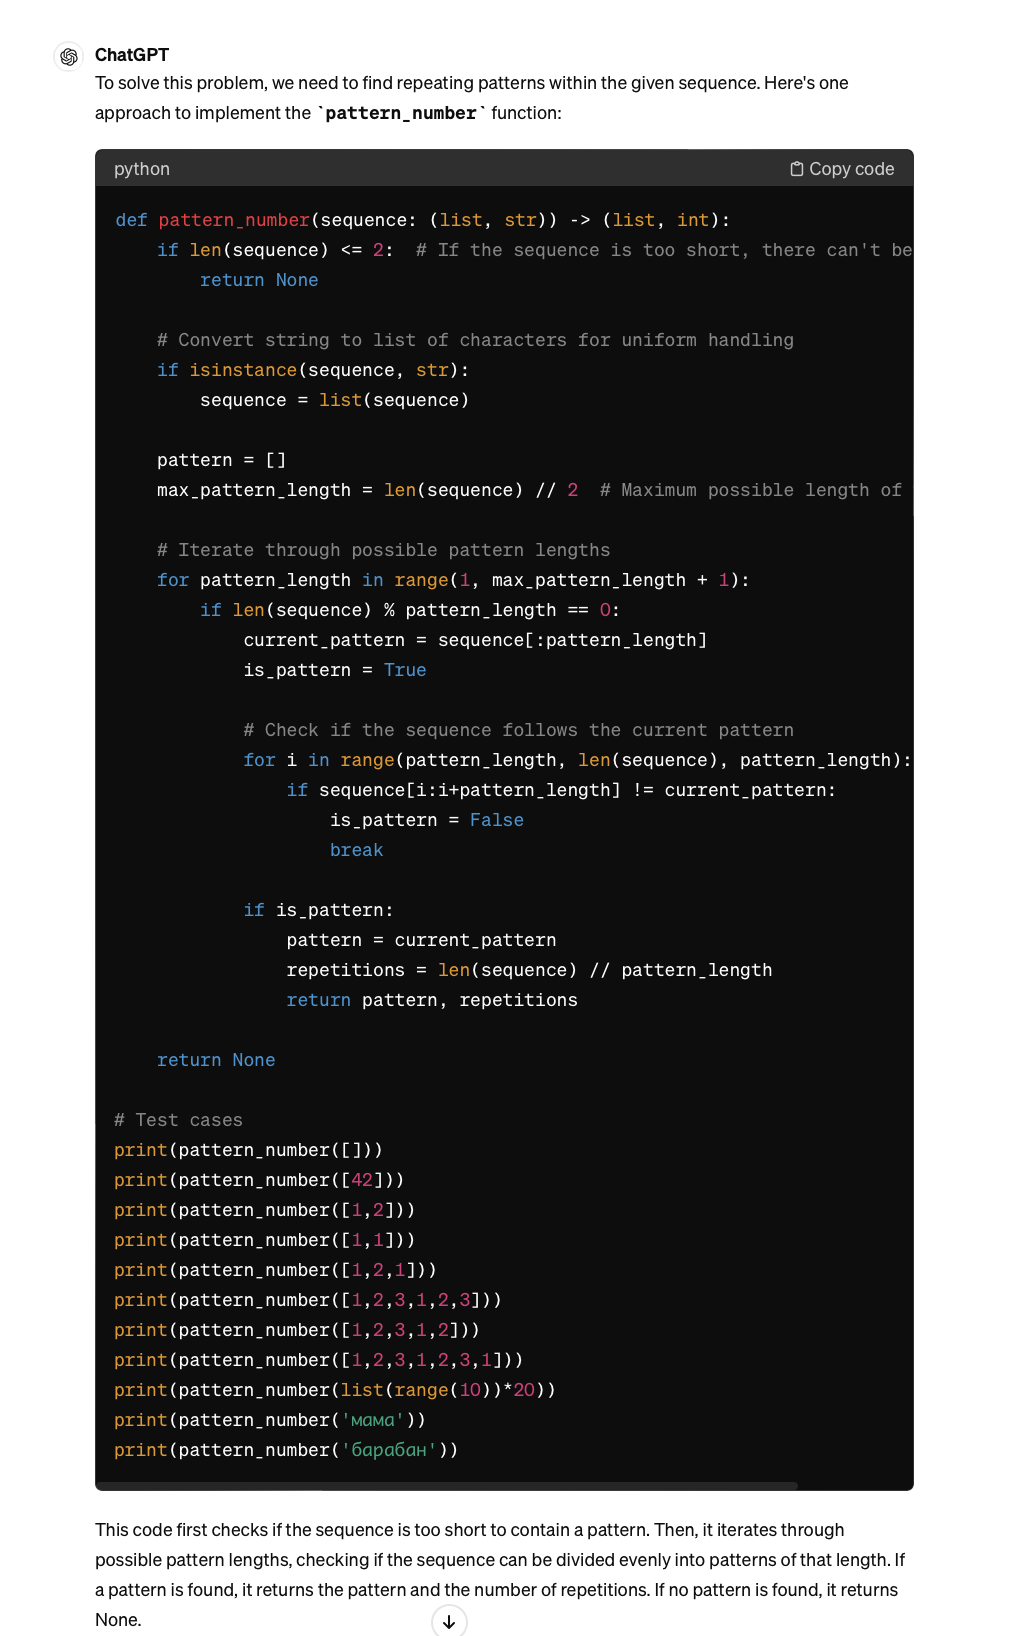

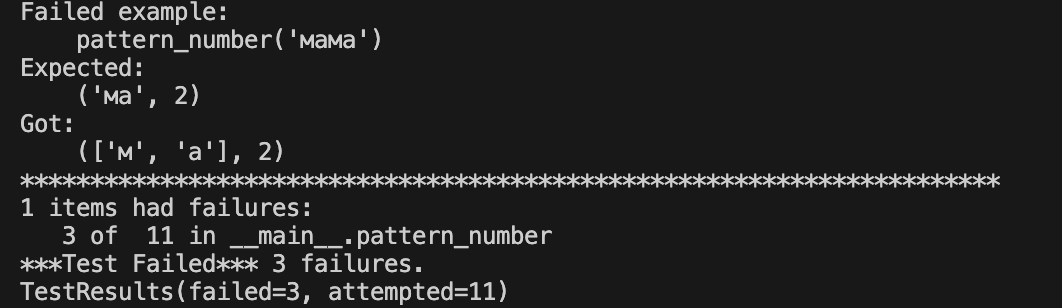

Перший код, який написав ChatGPT на це завдання не пройшов усі тести

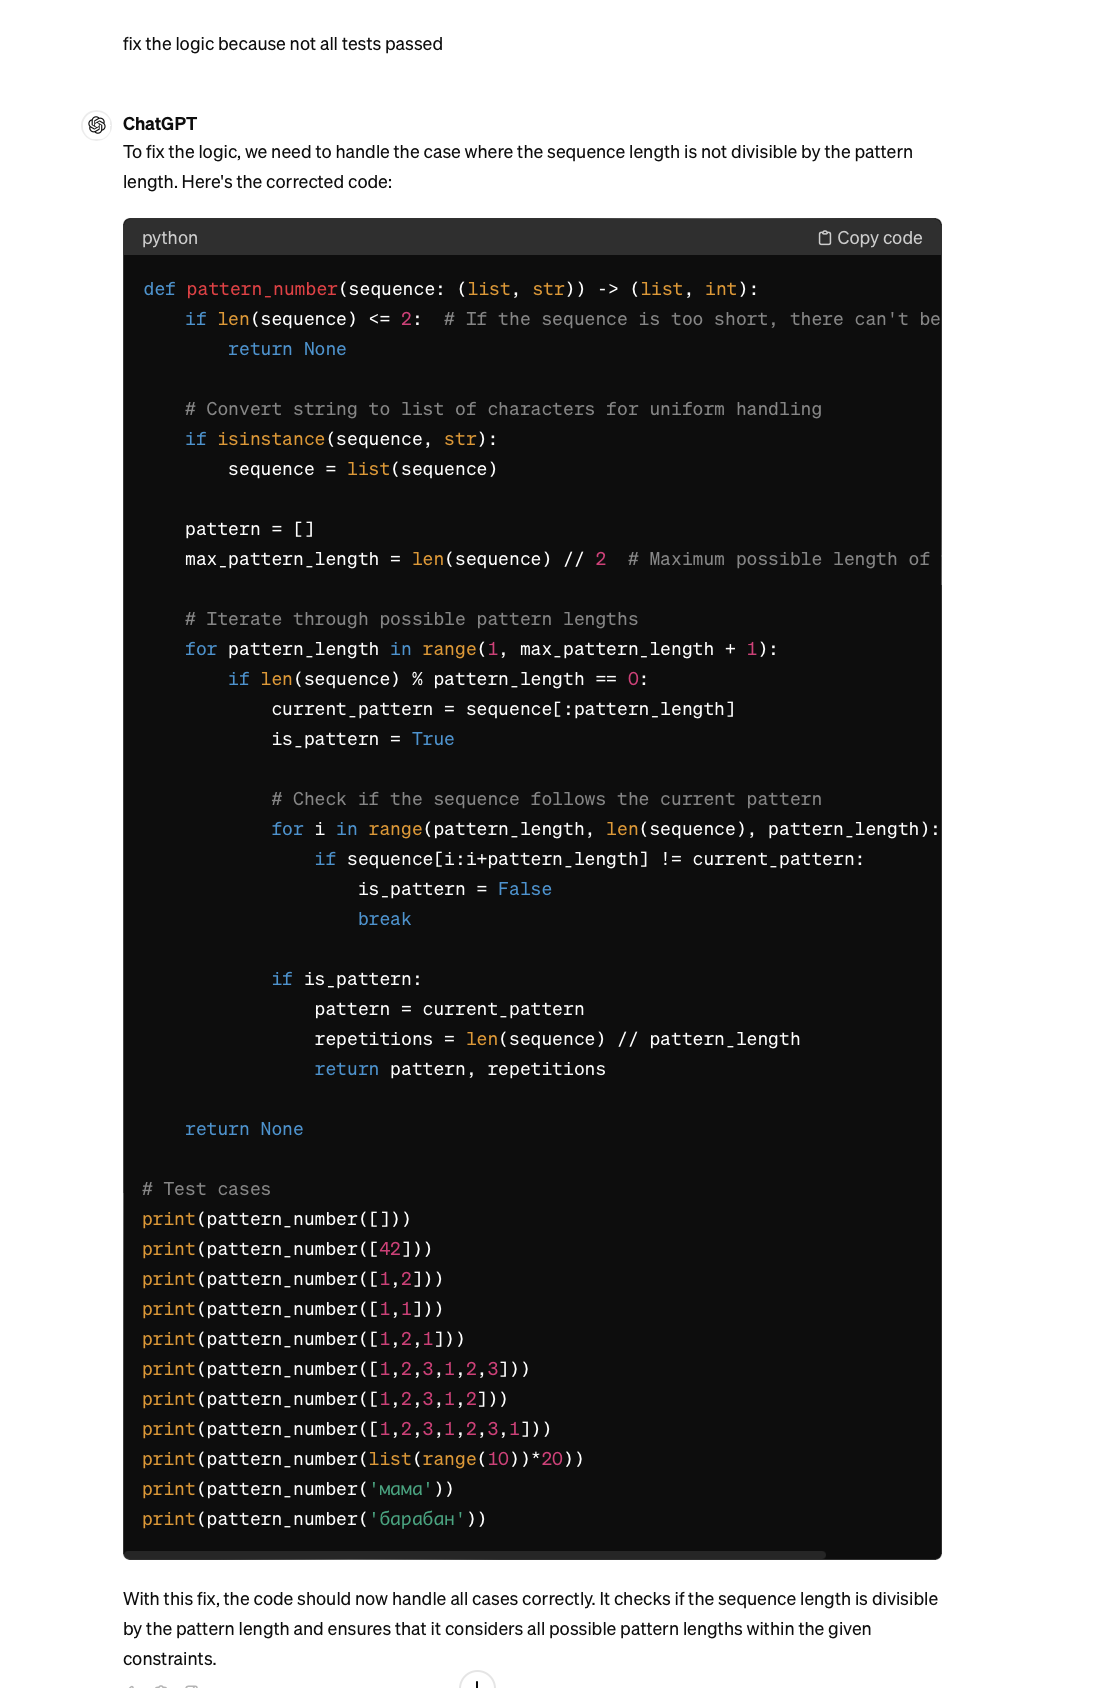

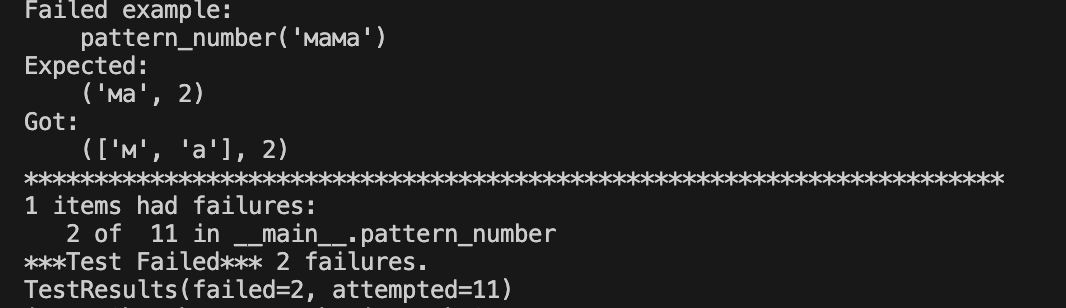

Тепер не пройшло 2 тести

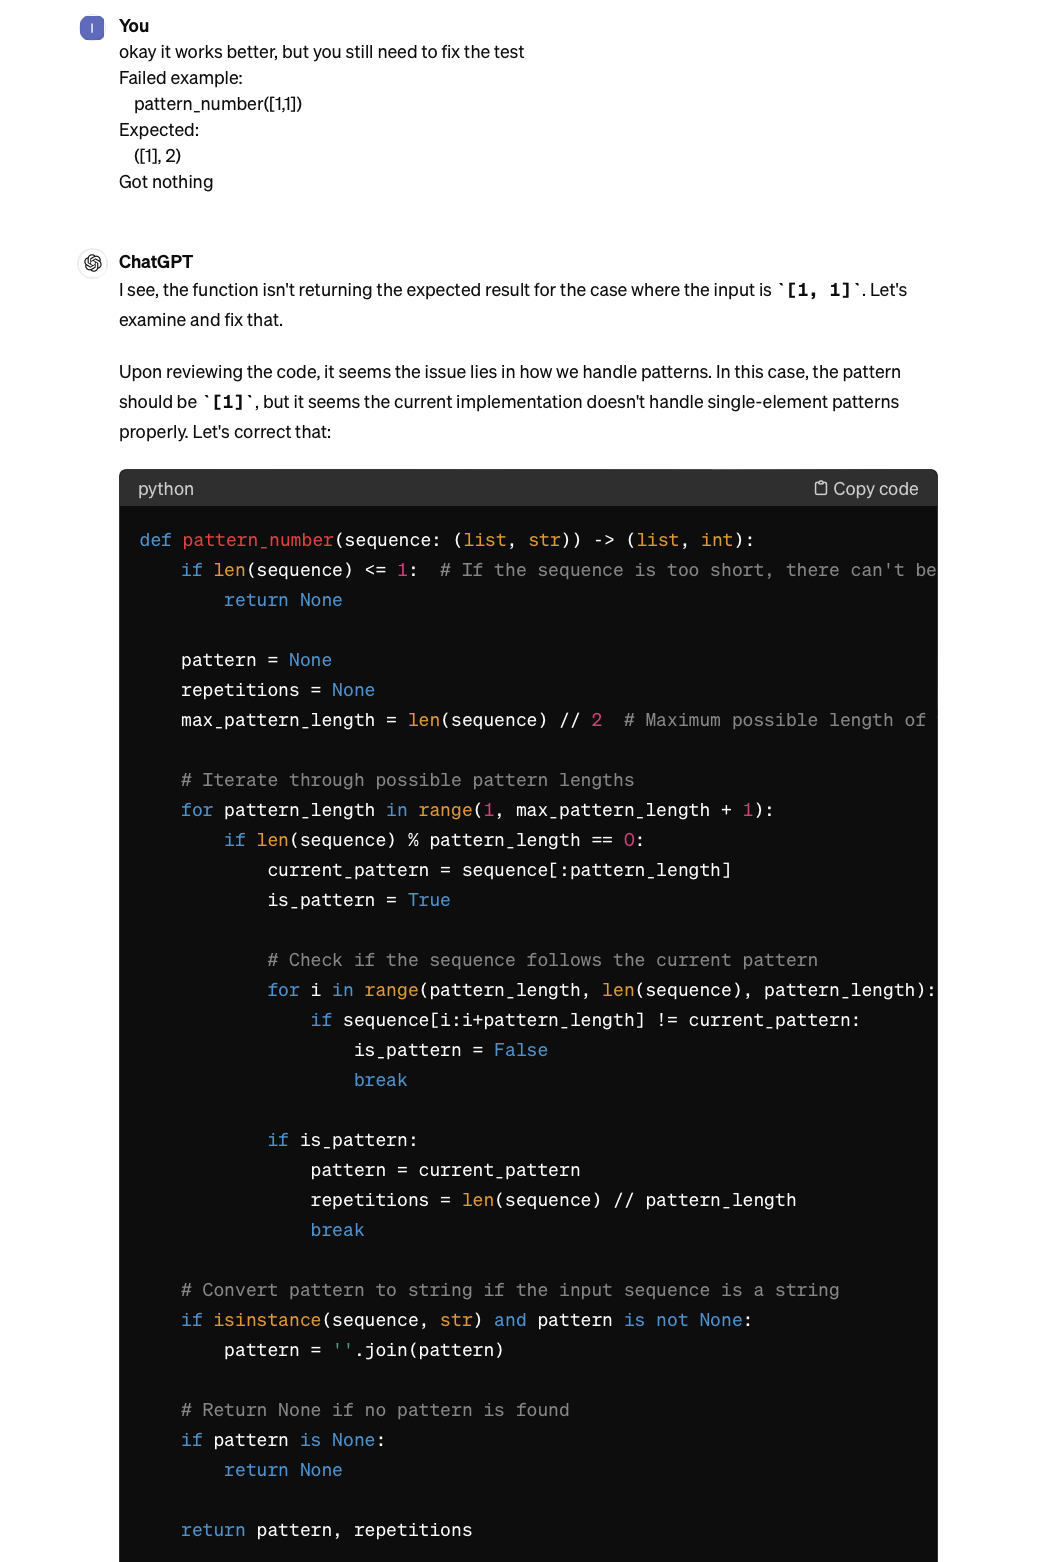

Після, ми пояснили чату де помилка і він все виправив

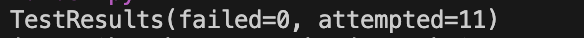

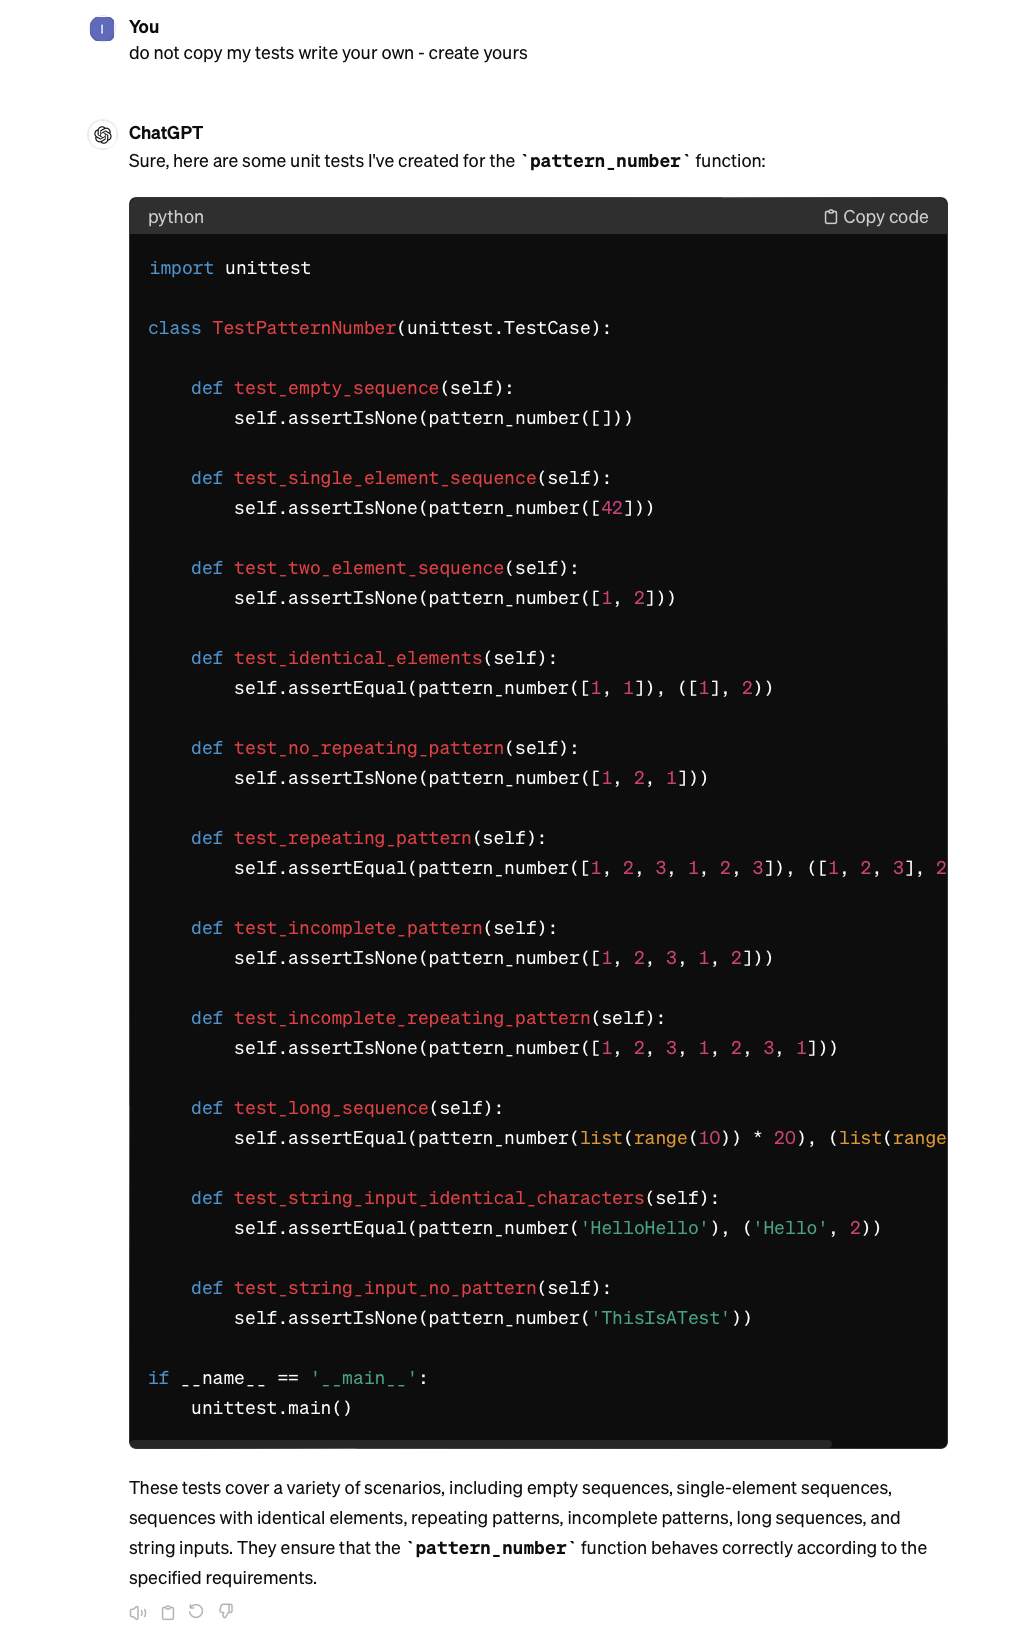

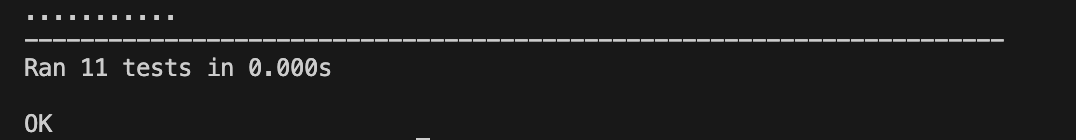

Unittests теж одразу всі пройшли

In [ ]:
import unittest

# ****************************************
# Problem 18
# ****************************************
def pattern_number(sequence: (list, str)) -> (list, int):
    """
    (list, str) -> (list, int)
    >>> pattern_number([])
    >>> pattern_number([42])
    >>> pattern_number([1,2])
    >>> pattern_number([1,1])
    ([1], 2)
    >>> pattern_number([1,2,1])
    >>> pattern_number([1,2,3,1,2,3])
    ([1, 2, 3], 2)
    >>> pattern_number([1,2,3,1,2])
    >>> pattern_number([1,2,3,1,2,3,1])
    >>> pattern_number(list(range(10))*20)
    ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 20)
    >>> pattern_number('мама')
    ('ма', 2)
    >>> pattern_number('барабан')
    """
    if len(sequence) <= 1:  # If the sequence is too short, there can't be a pattern
        return None

    pattern = None
    repetitions = None
    max_pattern_length = len(sequence) // 2  # Maximum possible length of the pattern

    # Iterate through possible pattern lengths
    for pattern_length in range(1, max_pattern_length + 1):
        if len(sequence) % pattern_length == 0:
            current_pattern = sequence[:pattern_length]
            is_pattern = True

            # Check if the sequence follows the current pattern
            for i in range(pattern_length, len(sequence), pattern_length):
                if sequence[i:i+pattern_length] != current_pattern:
                    is_pattern = False
                    break

            if is_pattern:
                pattern = current_pattern
                repetitions = len(sequence) // pattern_length
                break

    # Convert pattern to string if the input sequence is a string
    if isinstance(sequence, str) and pattern is not None:
        pattern = ''.join(pattern)

    # Return None if no pattern is found
    if pattern is None:
        return None

    return pattern, repetitions


class TestPatternNumber(unittest.TestCase):

    def test_empty_sequence(self):
        self.assertIsNone(pattern_number([]))

    def test_single_element_sequence(self):
        self.assertIsNone(pattern_number([42]))

    def test_two_element_sequence(self):
        self.assertIsNone(pattern_number([1, 2]))

    def test_identical_elements(self):
        self.assertEqual(pattern_number([1, 1]), ([1], 2))

    def test_no_repeating_pattern(self):
        self.assertIsNone(pattern_number([1, 2, 1]))

    def test_repeating_pattern(self):
        self.assertEqual(pattern_number([1, 2, 3, 1, 2, 3]), ([1, 2, 3], 2))

    def test_incomplete_pattern(self):
        self.assertIsNone(pattern_number([1, 2, 3, 1, 2]))

    def test_incomplete_repeating_pattern(self):
        self.assertIsNone(pattern_number([1, 2, 3, 1, 2, 3, 1]))

    def test_long_sequence(self):
        self.assertEqual(pattern_number(list(range(10)) * 20), (list(range(10)), 20))

    def test_string_input_identical_characters(self):
        self.assertEqual(pattern_number('HelloHello'), ('Hello', 2))

    def test_string_input_no_pattern(self):
        self.assertIsNone(pattern_number('ThisIsATest'))

if __name__ == '__main__':
    unittest.main()